# Study of ads for the sale of apartments

We have at our disposal the data of the real estate purchase / sale service - an archive of advertisements for the sale of apartments in the city and neighboring settlements for several years. The task is to set the parameters. This will allow to build an automated system: it will track anomalies and fraudulent activity.

Two types of data are available for each apartment for sale. The first ones are entered by the user, the second ones are obtained automatically on the basis of cartographic data. For example, the distance to the center, airport, nearest park and reservoir.

### Research data
The data for the study contains the following categories (columns):
- airports_nearest - distance to the nearest airport in meters (m)
- balcony — number of balconies
- ceiling_height - ceiling height (m)
- cityCenters_nearest - distance to the city center (m)
- days_exposition - how many days the ad was placed (from publication to removal)
- first_day_exposition — publication date
- floor - floor
- floors_total - total floors in the house
- is_apartment - apartments (boolean type)
- kitchen_area - kitchen area in square meters (m²)
- last_price - price at the time of removal from publication
- living_area - living area in square meters (m²)
- locality_name - name of the locality
- open_plan - free layout (boolean type)
- parks_around3000 - number of parks within a 3 km radius
- parks_nearest - distance to the nearest park (m)
- ponds_around3000 - number of ponds within a radius of 3 km
- ponds_nearest — distance to the nearest body of water (m)
- rooms - number of rooms
- studio - studio apartment (boolean type)
- total_area - area of the apartment in square meters (m²)
- total_images - the number of photos of the apartment in the ad
*Explanation:* apartments are non-residential premises that do not belong to the housing stock, but have the necessary conditions for living.

### Study plan
In the future work, we will adhere to the following plan:
1. Study general information on the data
2. Data preprocessing
3. Calculate and add to the table:
  - price per square meter;
  - day of the week, month and year of publication of the announcement;
  - floor of the apartment; options - first, last, other;
  - the ratio of living and total area, as well as the ratio of kitchen area to total
4. Conduct an exploratory data analysis and perform the necessary actions:
  - Study the following parameters: area, price, number of rooms, ceiling height. Build histograms for each parameter.
  - To study the time of sale of the apartment. Build a histogram. Calculate the mean and median. Describe how long a sale usually takes. When can sales be considered very fast, and when unusually long?
  - Remove rare and outliers. Describe what features you found.
  - What factors most influence the cost of an apartment? To study whether the price depends on the area, number of rooms, distance from the center. To study the dependence of the price on which floor the apartment is located on: first, last or another. Also study the dependence on the date of placement: day of the week, month and year.
  - Select 10 settlements with the largest number of ads. Calculate the average price per square meter in these settlements. Select among them the settlements with the highest and lowest cost of housing.
  - Explore apartment offers: for each apartment there is information about the distance to the center. Select apartments in the city. Our task is to find out which area is included in the center. Create a column with the distance to the center in kilometers: round to whole values. After that, calculate the average price for each kilometer. Build a graph: it should show how the price depends on the distance from the center. Determine the boundary where the graph changes a lot - this will be the central zone.
  - Select a segment of apartments in the center. Analyze this territory and study the following parameters: area, price, number of rooms, ceiling height. Also highlight the factors that affect the cost of the apartment (number of rooms, floor, distance from the center, date of placement of the announcement). Draw conclusions. Do they differ from the general findings throughout the city?
5. Form a general conclusion

### Content of the study
1. [Researching general information](#start)
2. [Data preprocessing](#preprocessing)
3. [Counting and adding to the table](#calculations)
4. [Conduct exploratory data analysis and follow instructions](#research)
5. [General output](#finish)

## Step 1. Researching General Information<a id="start"></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
#flats = pd.read_csv('real_estate_data.csv', sep='\t')
flats = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [2]:
flats.info()
flats.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


## Conclusion

The received data contains information about 23,698 apartments divided into 22 categories. A first glance at the data reveals gaps in many categories, except for 8 of them (total_images, last_price, total_area, first_day_exposition, rooms, floor, studio, open_plan), the impact of which needs to be studied in detail. Let's move on to pre-processing the data before conducting the study.

## Step 2. Data preprocessing<a id="preprocessing"></a>

In [3]:
flats.dropna(subset = ['locality_name'], inplace = True)
flats.reset_index(drop=True, inplace=True)
flats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23650 entries, 0 to 23649
Data columns (total 22 columns):
total_images            23650 non-null int64
last_price              23650 non-null float64
total_area              23650 non-null float64
first_day_exposition    23650 non-null object
rooms                   23650 non-null int64
ceiling_height          14490 non-null float64
floors_total            23565 non-null float64
living_area             21752 non-null float64
floor                   23650 non-null int64
is_apartment            2760 non-null object
studio                  23650 non-null bool
open_plan               23650 non-null bool
kitchen_area            21381 non-null float64
balcony                 12137 non-null float64
locality_name           23650 non-null object
airports_nearest        18116 non-null float64
cityCenters_nearest     18139 non-null float64
parks_around3000        18140 non-null float64
parks_nearest           8064 non-null float64
ponds_around300

In [4]:
flats['locality_name'].describe()

count               23650
unique                364
top       Санкт-Петербург
freq                15721
Name: locality_name, dtype: object

In [5]:
def isCaps(row):
    locality = row['locality_name']
    for i in range(len(locality)):
        if locality[i].isupper() == True:
            return locality[i:]

In [6]:
flats['locality_name'] = flats.apply(isCaps, axis=1)
flats['locality_name'].describe()

count               23650
unique                305
top       Санкт-Петербург
freq                15721
Name: locality_name, dtype: object

Before preprocessing the data with categorization and filling in the gaps, we checked, removed missing values (in the amount of 49 pieces) and removed duplicates in the locality_name column, since it is the main one for further work.
When viewing unique values, it was found that some of the names of settlements are duplicated by indicating their different types in front of the name. To solve this situation, the function of searching for the first capital letter (name) and saving only the name in the locality_name column was applied.

In [7]:
flats_ceiling_dict = (
    flats
    .pivot_table(index=['locality_name', 'floors_total','rooms'], 
                 values='ceiling_height', 
                 aggfunc='median')
)

In [8]:
def ceiling_index(row):
    locality_name = row['locality_name']
    floors_total = row['floors_total']
    rooms = row['rooms']
    ceiling_index = tuple([locality_name, floors_total, rooms])
    return ceiling_index
flats['ceiling_index'] = flats.apply(ceiling_index, axis=1)

In [9]:
flats['ceiling_height'] = (
    flats['ceiling_height']
    .fillna(flats['ceiling_index'].map(flats_ceiling_dict['ceiling_height']))
)
flats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23650 entries, 0 to 23649
Data columns (total 23 columns):
total_images            23650 non-null int64
last_price              23650 non-null float64
total_area              23650 non-null float64
first_day_exposition    23650 non-null object
rooms                   23650 non-null int64
ceiling_height          22809 non-null float64
floors_total            23565 non-null float64
living_area             21752 non-null float64
floor                   23650 non-null int64
is_apartment            2760 non-null object
studio                  23650 non-null bool
open_plan               23650 non-null bool
kitchen_area            21381 non-null float64
balcony                 12137 non-null float64
locality_name           23650 non-null object
airports_nearest        18116 non-null float64
cityCenters_nearest     18139 non-null float64
parks_around3000        18140 non-null float64
parks_nearest           8064 non-null float64
ponds_around300

To fill in the missing values found in the ceiling_height, categorization by locality_name, floors_total and rooms was applied with the calculation of the median for each of the possible options. After filling in, out of the initially discovered gaps in the amount of 9,160, there were still 841 left. To fill them, a function with a smaller number of categories was applied.

In [10]:
flats_ceiling_dict2 = (
    flats
    .pivot_table(index=['locality_name', 'floors_total'], 
                 values='ceiling_height', 
                 aggfunc='median')
)

In [11]:
def ceiling_index2(row):
    locality_name = row['locality_name']
    floors_total = row['floors_total']
    ceiling_index2 = tuple([locality_name, floors_total])
    return ceiling_index2
flats['ceiling_index2'] = flats.apply(ceiling_index2, axis=1)
flats['ceiling_index2']

0        (Санкт-Петербург, 16.0)
1                 (Шушары, 11.0)
2         (Санкт-Петербург, 5.0)
3        (Санкт-Петербург, 14.0)
4        (Санкт-Петербург, 14.0)
                  ...           
23645     (Санкт-Петербург, 5.0)
23646               (Тосно, 5.0)
23647         (Рождествено, 3.0)
23648    (Санкт-Петербург, 17.0)
23649         (Новый Учхоз, 5.0)
Name: ceiling_index2, Length: 23650, dtype: object

In [12]:
flats['ceiling_height'] = (
    flats['ceiling_height']
    .fillna(flats['ceiling_index2'].map(flats_ceiling_dict2['ceiling_height']))
)
flats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23650 entries, 0 to 23649
Data columns (total 24 columns):
total_images            23650 non-null int64
last_price              23650 non-null float64
total_area              23650 non-null float64
first_day_exposition    23650 non-null object
rooms                   23650 non-null int64
ceiling_height          23256 non-null float64
floors_total            23565 non-null float64
living_area             21752 non-null float64
floor                   23650 non-null int64
is_apartment            2760 non-null object
studio                  23650 non-null bool
open_plan               23650 non-null bool
kitchen_area            21381 non-null float64
balcony                 12137 non-null float64
locality_name           23650 non-null object
airports_nearest        18116 non-null float64
cityCenters_nearest     18139 non-null float64
parks_around3000        18140 non-null float64
parks_nearest           8064 non-null float64
ponds_around300

In [13]:
flats.dropna(subset = ['ceiling_height'], inplace = True)
flats.reset_index(drop=True, inplace=True)
flats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23256 entries, 0 to 23255
Data columns (total 24 columns):
total_images            23256 non-null int64
last_price              23256 non-null float64
total_area              23256 non-null float64
first_day_exposition    23256 non-null object
rooms                   23256 non-null int64
ceiling_height          23256 non-null float64
floors_total            23247 non-null float64
living_area             21463 non-null float64
floor                   23256 non-null int64
is_apartment            2728 non-null object
studio                  23256 non-null bool
open_plan               23256 non-null bool
kitchen_area            21096 non-null float64
balcony                 11964 non-null float64
locality_name           23256 non-null object
airports_nearest        18008 non-null float64
cityCenters_nearest     18031 non-null float64
parks_around3000        18032 non-null float64
parks_nearest           8018 non-null float64
ponds_around300

By reducing the number of categories excluding rooms, the number of gaps was reduced to 394. After a two-step process of filling in, rows with residuals were removed to eliminate the effect of gaps on the results of further analysis.

In [14]:
flats.dropna(subset = ['floors_total'], inplace = True)
flats.reset_index(drop=True, inplace=True)
flats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23247 entries, 0 to 23246
Data columns (total 24 columns):
total_images            23247 non-null int64
last_price              23247 non-null float64
total_area              23247 non-null float64
first_day_exposition    23247 non-null object
rooms                   23247 non-null int64
ceiling_height          23247 non-null float64
floors_total            23247 non-null float64
living_area             21457 non-null float64
floor                   23247 non-null int64
is_apartment            2728 non-null object
studio                  23247 non-null bool
open_plan               23247 non-null bool
kitchen_area            21091 non-null float64
balcony                 11962 non-null float64
locality_name           23247 non-null object
airports_nearest        18000 non-null float64
cityCenters_nearest     18023 non-null float64
parks_around3000        18024 non-null float64
parks_nearest           8016 non-null float64
ponds_around300

In [15]:
flats['floors_total'] = flats['floors_total'].astype('int')
flats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23247 entries, 0 to 23246
Data columns (total 24 columns):
total_images            23247 non-null int64
last_price              23247 non-null float64
total_area              23247 non-null float64
first_day_exposition    23247 non-null object
rooms                   23247 non-null int64
ceiling_height          23247 non-null float64
floors_total            23247 non-null int64
living_area             21457 non-null float64
floor                   23247 non-null int64
is_apartment            2728 non-null object
studio                  23247 non-null bool
open_plan               23247 non-null bool
kitchen_area            21091 non-null float64
balcony                 11962 non-null float64
locality_name           23247 non-null object
airports_nearest        18000 non-null float64
cityCenters_nearest     18023 non-null float64
parks_around3000        18024 non-null float64
parks_nearest           8016 non-null float64
ponds_around3000 

In the floors_total category, due to the small number of gaps (9 pieces) in relation to the total number of rows in the data and because of the importance of this category for further analysis, it was decided to delete rows with missing values in this category. Most likely, the gaps in the values of the total number of floors in the house arose through the fault of the seller, who simply did not indicate it in the ad.
Additionally, since the total number of floors in a house is always an integer value, the type of this category has been changed from float to int.

In [16]:
flats_living_area_dict = (
    flats
    .pivot_table(index=['locality_name', 'floors_total','rooms'], 
                 values='living_area', 
                 aggfunc='median')
)

In [17]:
def living_area_index(row):
    locality_name = row['locality_name']
    floors_total = row['floors_total']
    rooms = row['rooms']
    living_area_index = tuple([locality_name, floors_total, rooms])
    return living_area_index
flats['living_area_index'] = flats.apply(living_area_index, axis=1)

In [18]:
flats['living_area'] = (
    flats['living_area']
    .fillna(flats['living_area_index'].map(flats_living_area_dict['living_area']))
)
flats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23247 entries, 0 to 23246
Data columns (total 25 columns):
total_images            23247 non-null int64
last_price              23247 non-null float64
total_area              23247 non-null float64
first_day_exposition    23247 non-null object
rooms                   23247 non-null int64
ceiling_height          23247 non-null float64
floors_total            23247 non-null int64
living_area             23174 non-null float64
floor                   23247 non-null int64
is_apartment            2728 non-null object
studio                  23247 non-null bool
open_plan               23247 non-null bool
kitchen_area            21091 non-null float64
balcony                 11962 non-null float64
locality_name           23247 non-null object
airports_nearest        18000 non-null float64
cityCenters_nearest     18023 non-null float64
parks_around3000        18024 non-null float64
parks_nearest           8016 non-null float64
ponds_around3000 

In [19]:
flats.dropna(subset = ['living_area'], inplace = True)
flats.reset_index(drop=True, inplace=True)
flats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23174 entries, 0 to 23173
Data columns (total 25 columns):
total_images            23174 non-null int64
last_price              23174 non-null float64
total_area              23174 non-null float64
first_day_exposition    23174 non-null object
rooms                   23174 non-null int64
ceiling_height          23174 non-null float64
floors_total            23174 non-null int64
living_area             23174 non-null float64
floor                   23174 non-null int64
is_apartment            2721 non-null object
studio                  23174 non-null bool
open_plan               23174 non-null bool
kitchen_area            21077 non-null float64
balcony                 11949 non-null float64
locality_name           23174 non-null object
airports_nearest        17984 non-null float64
cityCenters_nearest     18007 non-null float64
parks_around3000        18008 non-null float64
parks_nearest           8009 non-null float64
ponds_around3000 

To fill in the missing values found in living_area, categorization by locality_name, floors_total, and rooms was applied, with the calculation of the median for each of the possible options. After the filling, out of the initially detected gaps in the amount of 1,790, 73 more remained. They were removed, since an additional filling step with fewer categories would lose the necessary sensitivity to the parameter being filled.

In [20]:
flats['is_apartment'].unique()

array([nan, False, True], dtype=object)

In [21]:
flats['is_apartment'] = flats['is_apartment'].fillna('False')
flats['is_apartment'].unique()

array(['False', False, True], dtype=object)

In [22]:
flats['is_apartment'] = flats['is_apartment'].astype('bool')
flats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23174 entries, 0 to 23173
Data columns (total 25 columns):
total_images            23174 non-null int64
last_price              23174 non-null float64
total_area              23174 non-null float64
first_day_exposition    23174 non-null object
rooms                   23174 non-null int64
ceiling_height          23174 non-null float64
floors_total            23174 non-null int64
living_area             23174 non-null float64
floor                   23174 non-null int64
is_apartment            23174 non-null bool
studio                  23174 non-null bool
open_plan               23174 non-null bool
kitchen_area            21077 non-null float64
balcony                 11949 non-null float64
locality_name           23174 non-null object
airports_nearest        17984 non-null float64
cityCenters_nearest     18007 non-null float64
parks_around3000        18008 non-null float64
parks_nearest           8009 non-null float64
ponds_around3000  

The is_apartment category has a very low number of populated values. The analysis of unique values showed that in this category they can take either True or False, or be skipped. Since offers for apartments for sale are rare, it was decided to replace all gaps with False values, that is, to confirm that rows with missing values refer to apartments, and not apartments. Additionally, due to the nature of the data in this category, its type has been changed from object to bool.

In [23]:
flats_kitchen_area_dict = (
    flats
    .pivot_table(index=['locality_name', 'floors_total','rooms'], 
                 values='kitchen_area', 
                 aggfunc='median')
)

In [24]:
def kitchen_area_index(row):
    locality_name = row['locality_name']
    floors_total = row['floors_total']
    rooms = row['rooms']
    kitchen_area_index = tuple([locality_name, floors_total, rooms])
    return kitchen_area_index
flats['kitchen_area_index'] = flats.apply(kitchen_area_index, axis=1)

In [25]:
flats['kitchen_area'] = (
    flats['kitchen_area']
    .fillna(flats['kitchen_area_index'].map(flats_kitchen_area_dict['kitchen_area']))
)
flats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23174 entries, 0 to 23173
Data columns (total 26 columns):
total_images            23174 non-null int64
last_price              23174 non-null float64
total_area              23174 non-null float64
first_day_exposition    23174 non-null object
rooms                   23174 non-null int64
ceiling_height          23174 non-null float64
floors_total            23174 non-null int64
living_area             23174 non-null float64
floor                   23174 non-null int64
is_apartment            23174 non-null bool
studio                  23174 non-null bool
open_plan               23174 non-null bool
kitchen_area            22967 non-null float64
balcony                 11949 non-null float64
locality_name           23174 non-null object
airports_nearest        17984 non-null float64
cityCenters_nearest     18007 non-null float64
parks_around3000        18008 non-null float64
parks_nearest           8009 non-null float64
ponds_around3000  

In [26]:
flats.dropna(subset = ['kitchen_area'], inplace = True)
flats.reset_index(drop=True, inplace=True)
flats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22967 entries, 0 to 22966
Data columns (total 26 columns):
total_images            22967 non-null int64
last_price              22967 non-null float64
total_area              22967 non-null float64
first_day_exposition    22967 non-null object
rooms                   22967 non-null int64
ceiling_height          22967 non-null float64
floors_total            22967 non-null int64
living_area             22967 non-null float64
floor                   22967 non-null int64
is_apartment            22967 non-null bool
studio                  22967 non-null bool
open_plan               22967 non-null bool
kitchen_area            22967 non-null float64
balcony                 11813 non-null float64
locality_name           22967 non-null object
airports_nearest        17861 non-null float64
cityCenters_nearest     17884 non-null float64
parks_around3000        17885 non-null float64
parks_nearest           7979 non-null float64
ponds_around3000  

The previously applied method of filling through categorization with the definition of a median for the parameter was applied here as well.
The remaining gaps in the amount of 207 pieces were removed to exclude their influence on further analysis.

In [27]:
flats['balcony'] = flats['balcony'].fillna(0)
flats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22967 entries, 0 to 22966
Data columns (total 26 columns):
total_images            22967 non-null int64
last_price              22967 non-null float64
total_area              22967 non-null float64
first_day_exposition    22967 non-null object
rooms                   22967 non-null int64
ceiling_height          22967 non-null float64
floors_total            22967 non-null int64
living_area             22967 non-null float64
floor                   22967 non-null int64
is_apartment            22967 non-null bool
studio                  22967 non-null bool
open_plan               22967 non-null bool
kitchen_area            22967 non-null float64
balcony                 22967 non-null float64
locality_name           22967 non-null object
airports_nearest        17861 non-null float64
cityCenters_nearest     17884 non-null float64
parks_around3000        17885 non-null float64
parks_nearest           7979 non-null float64
ponds_around3000  

In [28]:
flats['balcony'] = flats['balcony'].astype('int')
flats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22967 entries, 0 to 22966
Data columns (total 26 columns):
total_images            22967 non-null int64
last_price              22967 non-null float64
total_area              22967 non-null float64
first_day_exposition    22967 non-null object
rooms                   22967 non-null int64
ceiling_height          22967 non-null float64
floors_total            22967 non-null int64
living_area             22967 non-null float64
floor                   22967 non-null int64
is_apartment            22967 non-null bool
studio                  22967 non-null bool
open_plan               22967 non-null bool
kitchen_area            22967 non-null float64
balcony                 22967 non-null int64
locality_name           22967 non-null object
airports_nearest        17861 non-null float64
cityCenters_nearest     17884 non-null float64
parks_around3000        17885 non-null float64
parks_nearest           7979 non-null float64
ponds_around3000    

The gaps in the balcony category most likely indicate that there are actually no balconies - they have been replaced with 0. Additionally, since the values in this category can only take integer values, their type has been changed from float to int.

In [29]:
flats['airports_nearest'] = flats['airports_nearest'].fillna(-1)
flats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22967 entries, 0 to 22966
Data columns (total 26 columns):
total_images            22967 non-null int64
last_price              22967 non-null float64
total_area              22967 non-null float64
first_day_exposition    22967 non-null object
rooms                   22967 non-null int64
ceiling_height          22967 non-null float64
floors_total            22967 non-null int64
living_area             22967 non-null float64
floor                   22967 non-null int64
is_apartment            22967 non-null bool
studio                  22967 non-null bool
open_plan               22967 non-null bool
kitchen_area            22967 non-null float64
balcony                 22967 non-null int64
locality_name           22967 non-null object
airports_nearest        22967 non-null float64
cityCenters_nearest     17884 non-null float64
parks_around3000        17885 non-null float64
parks_nearest           7979 non-null float64
ponds_around3000    

The analysis of the general information on the data showed the presence of a significant number (about 23%) of missing values in the airports_nearest category. Given that the indicator of the distance to the nearest airport is secondary and may potentially not be indicated by the seller intentionally, it was decided not to fill in the missing values, but for the convenience of further work, replace them with a stub value -1.

In [30]:
flats['cityCenters_nearest'] = flats['cityCenters_nearest'].fillna(-1)
flats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22967 entries, 0 to 22966
Data columns (total 26 columns):
total_images            22967 non-null int64
last_price              22967 non-null float64
total_area              22967 non-null float64
first_day_exposition    22967 non-null object
rooms                   22967 non-null int64
ceiling_height          22967 non-null float64
floors_total            22967 non-null int64
living_area             22967 non-null float64
floor                   22967 non-null int64
is_apartment            22967 non-null bool
studio                  22967 non-null bool
open_plan               22967 non-null bool
kitchen_area            22967 non-null float64
balcony                 22967 non-null int64
locality_name           22967 non-null object
airports_nearest        22967 non-null float64
cityCenters_nearest     22967 non-null float64
parks_around3000        17885 non-null float64
parks_nearest           7979 non-null float64
ponds_around3000    

The analysis of the general information on the data showed the presence of a significant number (about 23%) of missing values in the cityCenters_nearest category. Given that the indicator of the distance to the city center is secondary and may potentially not be indicated intentionally by the seller, it was decided not to fill in the missing values, but for the convenience of further work, replace them with a stub value -1.

In [31]:
flats['parks_around3000'] = flats['parks_around3000'].fillna(-1)
flats['parks_around3000'] = flats['parks_around3000'].astype('int')
flats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22967 entries, 0 to 22966
Data columns (total 26 columns):
total_images            22967 non-null int64
last_price              22967 non-null float64
total_area              22967 non-null float64
first_day_exposition    22967 non-null object
rooms                   22967 non-null int64
ceiling_height          22967 non-null float64
floors_total            22967 non-null int64
living_area             22967 non-null float64
floor                   22967 non-null int64
is_apartment            22967 non-null bool
studio                  22967 non-null bool
open_plan               22967 non-null bool
kitchen_area            22967 non-null float64
balcony                 22967 non-null int64
locality_name           22967 non-null object
airports_nearest        22967 non-null float64
cityCenters_nearest     22967 non-null float64
parks_around3000        22967 non-null int64
parks_nearest           7979 non-null float64
ponds_around3000      

The analysis of the general information on the data showed the presence of a significant number (about 23%) of missing values in the parks_around3000 category. Considering that the indicator of the number of parks within a radius of three kilometers is secondary and may potentially not be indicated by the seller intentionally, it was decided not to fill in the missing values, but for the convenience of further work, replace them with a stub value -1.
Additionally, since this indicator can only take integer values, its type has been changed to int.

In [32]:
flats['parks_nearest'] = flats['parks_nearest'].fillna(-1)
flats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22967 entries, 0 to 22966
Data columns (total 26 columns):
total_images            22967 non-null int64
last_price              22967 non-null float64
total_area              22967 non-null float64
first_day_exposition    22967 non-null object
rooms                   22967 non-null int64
ceiling_height          22967 non-null float64
floors_total            22967 non-null int64
living_area             22967 non-null float64
floor                   22967 non-null int64
is_apartment            22967 non-null bool
studio                  22967 non-null bool
open_plan               22967 non-null bool
kitchen_area            22967 non-null float64
balcony                 22967 non-null int64
locality_name           22967 non-null object
airports_nearest        22967 non-null float64
cityCenters_nearest     22967 non-null float64
parks_around3000        22967 non-null int64
parks_nearest           22967 non-null float64
ponds_around3000     

An analysis of the general information on the data showed a significant number (about 66%) of missing values in the parks_nearest category. Given that the indicator of the distance to the nearest park is secondary and may potentially not be indicated by the seller intentionally, it was decided not to fill in the missing values, but for the convenience of further work, replace them with a stub value -1.

In [33]:
flats['ponds_around3000'] = flats['ponds_around3000'].fillna(-1)
flats['ponds_around3000'] = flats['ponds_around3000'].astype('int')
flats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22967 entries, 0 to 22966
Data columns (total 26 columns):
total_images            22967 non-null int64
last_price              22967 non-null float64
total_area              22967 non-null float64
first_day_exposition    22967 non-null object
rooms                   22967 non-null int64
ceiling_height          22967 non-null float64
floors_total            22967 non-null int64
living_area             22967 non-null float64
floor                   22967 non-null int64
is_apartment            22967 non-null bool
studio                  22967 non-null bool
open_plan               22967 non-null bool
kitchen_area            22967 non-null float64
balcony                 22967 non-null int64
locality_name           22967 non-null object
airports_nearest        22967 non-null float64
cityCenters_nearest     22967 non-null float64
parks_around3000        22967 non-null int64
parks_nearest           22967 non-null float64
ponds_around3000     

The analysis of the general information on the data showed the presence of a significant number (about 23%) of missing values in the ponds_around3000 category. Considering that the indicator of the number of water bodies within a radius of three kilometers is secondary and may potentially not be indicated by the seller intentionally, it was decided not to fill in the missing values, but for the convenience of further work, replace them with a stub value -1.
Additionally, since this indicator can only take integer values, its type has been changed to int.

In [34]:
flats['ponds_nearest'] = flats['ponds_nearest'].fillna(-1)
flats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22967 entries, 0 to 22966
Data columns (total 26 columns):
total_images            22967 non-null int64
last_price              22967 non-null float64
total_area              22967 non-null float64
first_day_exposition    22967 non-null object
rooms                   22967 non-null int64
ceiling_height          22967 non-null float64
floors_total            22967 non-null int64
living_area             22967 non-null float64
floor                   22967 non-null int64
is_apartment            22967 non-null bool
studio                  22967 non-null bool
open_plan               22967 non-null bool
kitchen_area            22967 non-null float64
balcony                 22967 non-null int64
locality_name           22967 non-null object
airports_nearest        22967 non-null float64
cityCenters_nearest     22967 non-null float64
parks_around3000        22967 non-null int64
parks_nearest           22967 non-null float64
ponds_around3000     

An analysis of the general information on the data showed the presence of a significant number (about 62%) of missing values in the ponds_nearest category. Given that the indicator of the distance to the nearest body of water is secondary and may potentially not be indicated by the seller intentionally, it was decided not to fill in the missing values, but for the convenience of further work, replace them with a stub value -1.

In [35]:
flats['days_exposition'] = flats['days_exposition'].fillna(-1)
flats['days_exposition'] = flats['days_exposition'].astype('int')
flats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22967 entries, 0 to 22966
Data columns (total 26 columns):
total_images            22967 non-null int64
last_price              22967 non-null float64
total_area              22967 non-null float64
first_day_exposition    22967 non-null object
rooms                   22967 non-null int64
ceiling_height          22967 non-null float64
floors_total            22967 non-null int64
living_area             22967 non-null float64
floor                   22967 non-null int64
is_apartment            22967 non-null bool
studio                  22967 non-null bool
open_plan               22967 non-null bool
kitchen_area            22967 non-null float64
balcony                 22967 non-null int64
locality_name           22967 non-null object
airports_nearest        22967 non-null float64
cityCenters_nearest     22967 non-null float64
parks_around3000        22967 non-null int64
parks_nearest           22967 non-null float64
ponds_around3000     

An analysis of the general information on the data showed the presence of a significant number (about 13%) of missing values in the days_exposition category. Considering that, according to the available information, we cannot fill in the missing values for the indicator of the number of days the ad was placed on our own, it was decided not to fill them in, but for the convenience of further work, replace them with a stub value -1.
Additionally, since this indicator can only take integer values, its type has been changed to int.

## Step 3. Counting and adding to the table<a id="calculations"></a>

In [36]:
flats['m_price'] = flats['last_price'] / flats['total_area']
flats.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,ceiling_index,ceiling_index2,living_area_index,kitchen_area_index,m_price
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.700,16,51.00,8,True,...,1,482.0,2,755.0,-1,"(Санкт-Петербург, 16.0, 3)","(Санкт-Петербург, 16.0)","(Санкт-Петербург, 16, 3)","(Санкт-Петербург, 16, 3)",120370.370370
1,10,5196000.0,56.00,2015-08-20T00:00:00,2,2.550,5,34.30,4,True,...,1,90.0,2,574.0,558,"(Санкт-Петербург, 5.0, 2)","(Санкт-Петербург, 5.0)","(Санкт-Петербург, 5, 2)","(Санкт-Петербург, 5, 2)",92785.714286
2,0,64900000.0,159.00,2015-07-24T00:00:00,3,2.605,14,44.40,9,True,...,2,84.0,3,234.0,424,"(Санкт-Петербург, 14.0, 3)","(Санкт-Петербург, 14.0)","(Санкт-Петербург, 14, 3)","(Санкт-Петербург, 14, 3)",408176.100629
3,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.030,14,32.00,13,True,...,2,112.0,1,48.0,121,"(Санкт-Петербург, 14.0, 2)","(Санкт-Петербург, 14.0)","(Санкт-Петербург, 14, 2)","(Санкт-Петербург, 14, 2)",100000.000000
4,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.625,12,14.40,5,True,...,-1,-1.0,-1,-1.0,55,"(Янино-1, 12.0, 1)","(Янино-1, 12.0)","(Янино-1, 12, 1)","(Янино-1, 12, 1)",95065.789474
5,6,3700000.0,37.30,2017-11-02T00:00:00,1,2.650,26,10.60,6,True,...,0,-1.0,0,-1.0,155,"(Парголово, 26.0, 1)","(Парголово, 26.0)","(Парголово, 26, 1)","(Парголово, 26, 1)",99195.710456
6,5,7915000.0,71.60,2019-04-18T00:00:00,2,2.750,24,33.70,22,True,...,0,-1.0,0,-1.0,-1,"(Санкт-Петербург, 24.0, 2)","(Санкт-Петербург, 24.0)","(Санкт-Петербург, 24, 2)","(Санкт-Петербург, 24, 2)",110544.692737
7,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.650,27,15.43,26,True,...,-1,-1.0,-1,-1.0,189,"(Мурино, 27.0, 1)","(Мурино, 27.0)","(Мурино, 27, 1)","(Мурино, 27, 1)",87454.764777
8,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.500,9,43.60,7,True,...,0,-1.0,0,-1.0,289,"(Санкт-Петербург, 9.0, 3)","(Санкт-Петербург, 9.0)","(Санкт-Петербург, 9, 3)","(Санкт-Петербург, 9, 3)",88524.590164
9,5,5050000.0,39.60,2017-11-16T00:00:00,1,2.670,12,20.30,3,True,...,1,310.0,2,553.0,137,"(Санкт-Петербург, 12.0, 1)","(Санкт-Петербург, 12.0)","(Санкт-Петербург, 12, 1)","(Санкт-Петербург, 12, 1)",127525.252525


For further analysis, the m_price column was added with data on the cost of 1 square meter of each apartment, which was determined by dividing the cost of the apartment by the total area.

In [37]:
flats['first_day_exposition'] = pd.to_datetime(flats['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
flats.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,ceiling_index,ceiling_index2,living_area_index,kitchen_area_index,m_price
0,20,13000000.0,108.00,2019-03-07,3,2.700,16,51.00,8,True,...,1,482.0,2,755.0,-1,"(Санкт-Петербург, 16.0, 3)","(Санкт-Петербург, 16.0)","(Санкт-Петербург, 16, 3)","(Санкт-Петербург, 16, 3)",120370.370370
1,10,5196000.0,56.00,2015-08-20,2,2.550,5,34.30,4,True,...,1,90.0,2,574.0,558,"(Санкт-Петербург, 5.0, 2)","(Санкт-Петербург, 5.0)","(Санкт-Петербург, 5, 2)","(Санкт-Петербург, 5, 2)",92785.714286
2,0,64900000.0,159.00,2015-07-24,3,2.605,14,44.40,9,True,...,2,84.0,3,234.0,424,"(Санкт-Петербург, 14.0, 3)","(Санкт-Петербург, 14.0)","(Санкт-Петербург, 14, 3)","(Санкт-Петербург, 14, 3)",408176.100629
3,2,10000000.0,100.00,2018-06-19,2,3.030,14,32.00,13,True,...,2,112.0,1,48.0,121,"(Санкт-Петербург, 14.0, 2)","(Санкт-Петербург, 14.0)","(Санкт-Петербург, 14, 2)","(Санкт-Петербург, 14, 2)",100000.000000
4,10,2890000.0,30.40,2018-09-10,1,2.625,12,14.40,5,True,...,-1,-1.0,-1,-1.0,55,"(Янино-1, 12.0, 1)","(Янино-1, 12.0)","(Янино-1, 12, 1)","(Янино-1, 12, 1)",95065.789474
5,6,3700000.0,37.30,2017-11-02,1,2.650,26,10.60,6,True,...,0,-1.0,0,-1.0,155,"(Парголово, 26.0, 1)","(Парголово, 26.0)","(Парголово, 26, 1)","(Парголово, 26, 1)",99195.710456
6,5,7915000.0,71.60,2019-04-18,2,2.750,24,33.70,22,True,...,0,-1.0,0,-1.0,-1,"(Санкт-Петербург, 24.0, 2)","(Санкт-Петербург, 24.0)","(Санкт-Петербург, 24, 2)","(Санкт-Петербург, 24, 2)",110544.692737
7,20,2900000.0,33.16,2018-05-23,1,2.650,27,15.43,26,True,...,-1,-1.0,-1,-1.0,189,"(Мурино, 27.0, 1)","(Мурино, 27.0)","(Мурино, 27, 1)","(Мурино, 27, 1)",87454.764777
8,18,5400000.0,61.00,2017-02-26,3,2.500,9,43.60,7,True,...,0,-1.0,0,-1.0,289,"(Санкт-Петербург, 9.0, 3)","(Санкт-Петербург, 9.0)","(Санкт-Петербург, 9, 3)","(Санкт-Петербург, 9, 3)",88524.590164
9,5,5050000.0,39.60,2017-11-16,1,2.670,12,20.30,3,True,...,1,310.0,2,553.0,137,"(Санкт-Петербург, 12.0, 1)","(Санкт-Петербург, 12.0)","(Санкт-Петербург, 12, 1)","(Санкт-Петербург, 12, 1)",127525.252525


In [38]:
flats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22967 entries, 0 to 22966
Data columns (total 27 columns):
total_images            22967 non-null int64
last_price              22967 non-null float64
total_area              22967 non-null float64
first_day_exposition    22967 non-null datetime64[ns]
rooms                   22967 non-null int64
ceiling_height          22967 non-null float64
floors_total            22967 non-null int64
living_area             22967 non-null float64
floor                   22967 non-null int64
is_apartment            22967 non-null bool
studio                  22967 non-null bool
open_plan               22967 non-null bool
kitchen_area            22967 non-null float64
balcony                 22967 non-null int64
locality_name           22967 non-null object
airports_nearest        22967 non-null float64
cityCenters_nearest     22967 non-null float64
parks_around3000        22967 non-null int64
parks_nearest           22967 non-null float64
ponds_around3

In [39]:
flats['weekday'] = flats['first_day_exposition'].dt.weekday
flats['month'] = flats['first_day_exposition'].dt.month
flats['year'] = flats['first_day_exposition'].dt.year
flats.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,ceiling_index,ceiling_index2,living_area_index,kitchen_area_index,m_price,weekday,month,year
0,20,13000000.0,108.00,2019-03-07,3,2.700,16,51.00,8,True,...,755.0,-1,"(Санкт-Петербург, 16.0, 3)","(Санкт-Петербург, 16.0)","(Санкт-Петербург, 16, 3)","(Санкт-Петербург, 16, 3)",120370.370370,3,3,2019
1,10,5196000.0,56.00,2015-08-20,2,2.550,5,34.30,4,True,...,574.0,558,"(Санкт-Петербург, 5.0, 2)","(Санкт-Петербург, 5.0)","(Санкт-Петербург, 5, 2)","(Санкт-Петербург, 5, 2)",92785.714286,3,8,2015
2,0,64900000.0,159.00,2015-07-24,3,2.605,14,44.40,9,True,...,234.0,424,"(Санкт-Петербург, 14.0, 3)","(Санкт-Петербург, 14.0)","(Санкт-Петербург, 14, 3)","(Санкт-Петербург, 14, 3)",408176.100629,4,7,2015
3,2,10000000.0,100.00,2018-06-19,2,3.030,14,32.00,13,True,...,48.0,121,"(Санкт-Петербург, 14.0, 2)","(Санкт-Петербург, 14.0)","(Санкт-Петербург, 14, 2)","(Санкт-Петербург, 14, 2)",100000.000000,1,6,2018
4,10,2890000.0,30.40,2018-09-10,1,2.625,12,14.40,5,True,...,-1.0,55,"(Янино-1, 12.0, 1)","(Янино-1, 12.0)","(Янино-1, 12, 1)","(Янино-1, 12, 1)",95065.789474,0,9,2018
5,6,3700000.0,37.30,2017-11-02,1,2.650,26,10.60,6,True,...,-1.0,155,"(Парголово, 26.0, 1)","(Парголово, 26.0)","(Парголово, 26, 1)","(Парголово, 26, 1)",99195.710456,3,11,2017
6,5,7915000.0,71.60,2019-04-18,2,2.750,24,33.70,22,True,...,-1.0,-1,"(Санкт-Петербург, 24.0, 2)","(Санкт-Петербург, 24.0)","(Санкт-Петербург, 24, 2)","(Санкт-Петербург, 24, 2)",110544.692737,3,4,2019
7,20,2900000.0,33.16,2018-05-23,1,2.650,27,15.43,26,True,...,-1.0,189,"(Мурино, 27.0, 1)","(Мурино, 27.0)","(Мурино, 27, 1)","(Мурино, 27, 1)",87454.764777,2,5,2018
8,18,5400000.0,61.00,2017-02-26,3,2.500,9,43.60,7,True,...,-1.0,289,"(Санкт-Петербург, 9.0, 3)","(Санкт-Петербург, 9.0)","(Санкт-Петербург, 9, 3)","(Санкт-Петербург, 9, 3)",88524.590164,6,2,2017
9,5,5050000.0,39.60,2017-11-16,1,2.670,12,20.30,3,True,...,553.0,137,"(Санкт-Петербург, 12.0, 1)","(Санкт-Петербург, 12.0)","(Санкт-Петербург, 12, 1)","(Санкт-Петербург, 12, 1)",127525.252525,3,11,2017


For analysis, the weekday, month and year columns were also added indicating the day of the week, month and year of the publication of the announcement, respectively. In the process of adding column data, the first_day_exposition column type was converted to date and time.

In [40]:
for i in range(len(flats)):
    if flats.loc[i, 'floor'] == 1:
        flats.loc[i, 'floor_cat'] = 'первый'
    elif flats.loc[i, 'floor'] == flats.loc[i, 'floors_total']:
        flats.loc[i, 'floor_cat'] = 'последний'
    else:
        flats.loc[i, 'floor_cat'] = 'другой'
flats.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,ceiling_index,ceiling_index2,living_area_index,kitchen_area_index,m_price,weekday,month,year,floor_cat
0,20,13000000.0,108.00,2019-03-07,3,2.700,16,51.00,8,True,...,-1,"(Санкт-Петербург, 16.0, 3)","(Санкт-Петербург, 16.0)","(Санкт-Петербург, 16, 3)","(Санкт-Петербург, 16, 3)",120370.370370,3,3,2019,другой
1,10,5196000.0,56.00,2015-08-20,2,2.550,5,34.30,4,True,...,558,"(Санкт-Петербург, 5.0, 2)","(Санкт-Петербург, 5.0)","(Санкт-Петербург, 5, 2)","(Санкт-Петербург, 5, 2)",92785.714286,3,8,2015,другой
2,0,64900000.0,159.00,2015-07-24,3,2.605,14,44.40,9,True,...,424,"(Санкт-Петербург, 14.0, 3)","(Санкт-Петербург, 14.0)","(Санкт-Петербург, 14, 3)","(Санкт-Петербург, 14, 3)",408176.100629,4,7,2015,другой
3,2,10000000.0,100.00,2018-06-19,2,3.030,14,32.00,13,True,...,121,"(Санкт-Петербург, 14.0, 2)","(Санкт-Петербург, 14.0)","(Санкт-Петербург, 14, 2)","(Санкт-Петербург, 14, 2)",100000.000000,1,6,2018,другой
4,10,2890000.0,30.40,2018-09-10,1,2.625,12,14.40,5,True,...,55,"(Янино-1, 12.0, 1)","(Янино-1, 12.0)","(Янино-1, 12, 1)","(Янино-1, 12, 1)",95065.789474,0,9,2018,другой
5,6,3700000.0,37.30,2017-11-02,1,2.650,26,10.60,6,True,...,155,"(Парголово, 26.0, 1)","(Парголово, 26.0)","(Парголово, 26, 1)","(Парголово, 26, 1)",99195.710456,3,11,2017,другой
6,5,7915000.0,71.60,2019-04-18,2,2.750,24,33.70,22,True,...,-1,"(Санкт-Петербург, 24.0, 2)","(Санкт-Петербург, 24.0)","(Санкт-Петербург, 24, 2)","(Санкт-Петербург, 24, 2)",110544.692737,3,4,2019,другой
7,20,2900000.0,33.16,2018-05-23,1,2.650,27,15.43,26,True,...,189,"(Мурино, 27.0, 1)","(Мурино, 27.0)","(Мурино, 27, 1)","(Мурино, 27, 1)",87454.764777,2,5,2018,другой
8,18,5400000.0,61.00,2017-02-26,3,2.500,9,43.60,7,True,...,289,"(Санкт-Петербург, 9.0, 3)","(Санкт-Петербург, 9.0)","(Санкт-Петербург, 9, 3)","(Санкт-Петербург, 9, 3)",88524.590164,6,2,2017,другой
9,5,5050000.0,39.60,2017-11-16,1,2.670,12,20.30,3,True,...,137,"(Санкт-Петербург, 12.0, 1)","(Санкт-Петербург, 12.0)","(Санкт-Петербург, 12, 1)","(Санкт-Петербург, 12, 1)",127525.252525,3,11,2017,другой


To categorize the floor of each apartment, a column floor_cat (floor category) was created, in which, depending on the available data, the floor of each apartment was marked as the first, last or other.

In [41]:
flats['living_ratio'] = flats['living_area'] / flats['total_area']
flats['kitchen_ratio'] = flats['kitchen_area'] / flats['total_area']
for i in range(len(flats)):
    if flats.loc[i, 'living_area'] == -1:
        flats.loc[i, 'living_ratio'] = -1
    else:
        pass
for i in range(len(flats)):
    if flats.loc[i, 'kitchen_area'] == -1:
        flats.loc[i, 'kitchen_ratio'] = -1
    else:
        pass
flats.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ceiling_index2,living_area_index,kitchen_area_index,m_price,weekday,month,year,floor_cat,living_ratio,kitchen_ratio
0,20,13000000.0,108.00,2019-03-07,3,2.700,16,51.00,8,True,...,"(Санкт-Петербург, 16.0)","(Санкт-Петербург, 16, 3)","(Санкт-Петербург, 16, 3)",120370.370370,3,3,2019,другой,0.472222,0.231481
1,10,5196000.0,56.00,2015-08-20,2,2.550,5,34.30,4,True,...,"(Санкт-Петербург, 5.0)","(Санкт-Петербург, 5, 2)","(Санкт-Петербург, 5, 2)",92785.714286,3,8,2015,другой,0.612500,0.148214
2,0,64900000.0,159.00,2015-07-24,3,2.605,14,44.40,9,True,...,"(Санкт-Петербург, 14.0)","(Санкт-Петербург, 14, 3)","(Санкт-Петербург, 14, 3)",408176.100629,4,7,2015,другой,0.279245,0.066038
3,2,10000000.0,100.00,2018-06-19,2,3.030,14,32.00,13,True,...,"(Санкт-Петербург, 14.0)","(Санкт-Петербург, 14, 2)","(Санкт-Петербург, 14, 2)",100000.000000,1,6,2018,другой,0.320000,0.410000
4,10,2890000.0,30.40,2018-09-10,1,2.625,12,14.40,5,True,...,"(Янино-1, 12.0)","(Янино-1, 12, 1)","(Янино-1, 12, 1)",95065.789474,0,9,2018,другой,0.473684,0.299342
5,6,3700000.0,37.30,2017-11-02,1,2.650,26,10.60,6,True,...,"(Парголово, 26.0)","(Парголово, 26, 1)","(Парголово, 26, 1)",99195.710456,3,11,2017,другой,0.284182,0.386059
6,5,7915000.0,71.60,2019-04-18,2,2.750,24,33.70,22,True,...,"(Санкт-Петербург, 24.0)","(Санкт-Петербург, 24, 2)","(Санкт-Петербург, 24, 2)",110544.692737,3,4,2019,другой,0.470670,0.263966
7,20,2900000.0,33.16,2018-05-23,1,2.650,27,15.43,26,True,...,"(Мурино, 27.0)","(Мурино, 27, 1)","(Мурино, 27, 1)",87454.764777,2,5,2018,другой,0.465320,0.265682
8,18,5400000.0,61.00,2017-02-26,3,2.500,9,43.60,7,True,...,"(Санкт-Петербург, 9.0)","(Санкт-Петербург, 9, 3)","(Санкт-Петербург, 9, 3)",88524.590164,6,2,2017,другой,0.714754,0.106557
9,5,5050000.0,39.60,2017-11-16,1,2.670,12,20.30,3,True,...,"(Санкт-Петербург, 12.0)","(Санкт-Петербург, 12, 1)","(Санкт-Петербург, 12, 1)",127525.252525,3,11,2017,другой,0.512626,0.214646


Additionally, for further analysis, columns were created with the ratio of living area to total area (living_ratio) and the ratio of kitchen area to total area (kitchen_ratio). Since we previously determined some of the rows were missing values for the living area and kitchen area, to save this information in the new living_ratio and kitchen_ratio columns, stub values -1 were put down.

## Step 4: Conduct exploratory data analysis and follow instructions<a id="research"></a>

In [42]:
flats['total_area'].describe()

count    22967.000000
mean        60.655804
std         35.579993
min         12.000000
25%         40.200000
50%         52.000000
75%         70.000000
max        900.000000
Name: total_area, dtype: float64

In [43]:
flats['total_area'].value_counts()

45.00     412
42.00     370
44.00     340
60.00     337
31.00     334
         ... 
347.00      1
158.60      1
34.08       1
38.32       1
23.55       1
Name: total_area, Length: 2106, dtype: int64

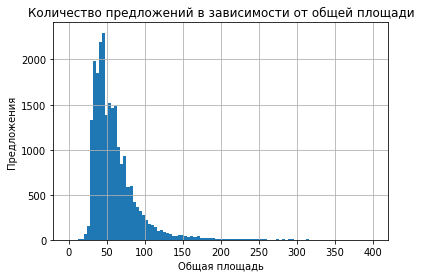

In [44]:
flats['total_area'].hist(bins=100, range=(0, 400))
plt.title('Количество предложений в зависимости от общей площади')
plt.xlabel('Общая площадь')
plt.ylabel('Предложения')
plt.show()

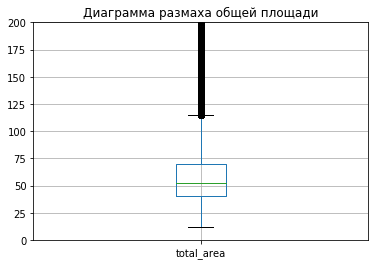

In [45]:
plt.ylim(0, 200)
flats.boxplot(column='total_area')
plt.title('Диаграмма размаха общей площади')
plt.show()

To visualize the total area parameter, its histogram was constructed, which showed its compliance with the normal distribution. It is noted that the most common offers with a total area of the apartment equal to 45 sq.m. The maximum value of the histogram was chosen to be less than the actual maximum value for better visibility. Visually, the values after 400 sq.m were only a small fraction, but they stretched the graph in width, not allowing you to properly familiarize yourself with it.

In [46]:
flats['last_price'].describe()

count    2.296700e+04
mean     6.596630e+06
std      9.824559e+06
min      1.219000e+04
25%      3.500000e+06
50%      4.700000e+06
75%      6.850000e+06
max      4.200000e+08
Name: last_price, dtype: float64

In [47]:
flats['last_price'].value_counts()

4500000.0     335
3500000.0     279
4300000.0     259
4000000.0     258
4200000.0     254
             ... 
2299000.0       1
25092624.0      1
20490000.0      1
10770000.0      1
6029433.0       1
Name: last_price, Length: 2876, dtype: int64

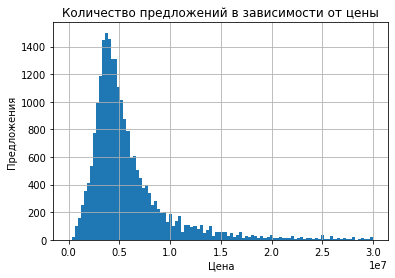

In [48]:
flats['last_price'].hist(bins=100, range=(0, 30000000))
plt.title('Количество предложений в зависимости от цены')
plt.xlabel('Цена')
plt.ylabel('Предложения')
plt.show()

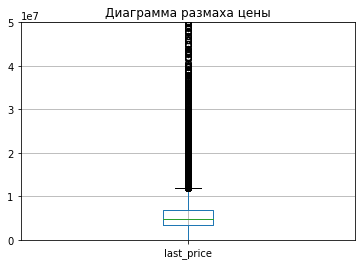

In [49]:
plt.ylim(0, 50000000)
flats.boxplot(column='last_price')
plt.title('Диаграмма размаха цены')
plt.show()

To visualize the apartment price parameter, its histogram was constructed, which showed its compliance with the normal distribution. It is noted that the most common offers with a price equal to 4,500,000.00 rubles. The maximum value of the histogram was chosen to be less than the actual maximum value for better visibility. Visually values after 30,000,000.00 rubles. accounted for only a small fraction, but stretched the graph in width, not allowing you to properly familiarize yourself with it.

In [50]:
flats['rooms'].describe()

count    22967.000000
mean         2.088736
std          1.067013
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

In [51]:
flats['rooms'].value_counts()

1     7871
2     7733
3     5694
4     1160
5      320
6      103
7       55
8       12
9        8
10       3
14       2
11       2
15       1
12       1
19       1
16       1
Name: rooms, dtype: int64

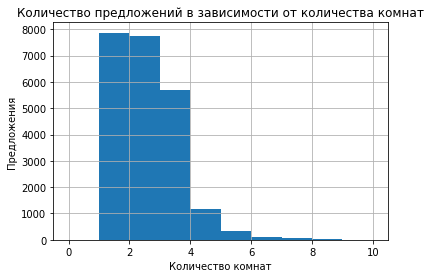

In [52]:
flats['rooms'].hist(bins=10, range=(0, 10))
plt.title('Количество предложений в зависимости от количества комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Предложения')
plt.show()

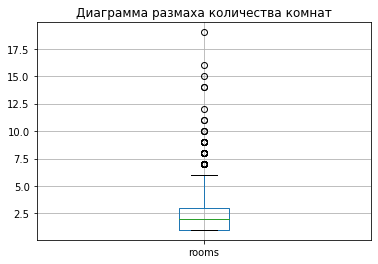

In [53]:
flats.boxplot(column='rooms')
plt.title('Диаграмма размаха количества комнат')
plt.show()

According to the results of the histogram analysis, it was noted that the largest number of proposals for apartments with two rooms, with a similar but lower value for one-room apartments.

In [54]:
flats['ceiling_height'].describe()

count    22967.000000
mean         2.741722
std          1.002072
min          1.000000
25%          2.550000
50%          2.650000
75%          2.760000
max        100.000000
Name: ceiling_height, dtype: float64

In [55]:
flats['ceiling_height'].value_counts()

2.50     4236
2.70     3187
2.55     2453
2.60     2202
2.75     1780
         ... 
3.43        1
4.37        1
3.44        1
4.25        1
14.85       1
Name: ceiling_height, Length: 223, dtype: int64

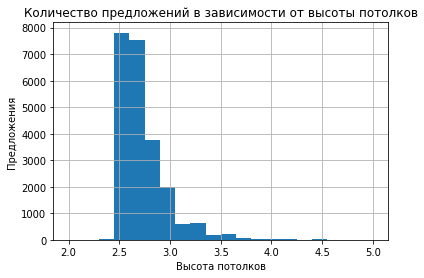

In [56]:
flats['ceiling_height'].hist(bins=20, range=(2, 5))
plt.title('Количество предложений в зависимости от высоты потолков')
plt.xlabel('Высота потолков')
plt.ylabel('Предложения')
plt.show()

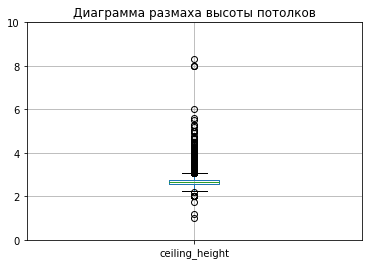

In [57]:
plt.ylim(0, 10)
flats.boxplot(column='ceiling_height')
plt.title('Диаграмма размаха высоты потолков')
plt.show()

To visualize the ceiling height parameter, its histogram was constructed, which showed its compliance with the normal distribution.  When drawing the histogram, the minimum value was 2 m and physically unlikely height values.  Visually, the values after 5 m were only a small fraction, but they stretched the graph in width, not allowing you to properly familiarize yourself with it. It is noted that the most common proposals with a height of 2.5 m.

In [58]:
flats['days_exposition'].describe()

count    22967.000000
mean       157.388209
std        214.461689
min         -1.000000
25%         22.000000
50%         74.000000
75%        200.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [59]:
flats['days_exposition'].value_counts()

-1       3098
 45       799
 60       521
 7        225
 30       202
         ... 
 775        1
 807        1
 871        1
 951        1
 1223       1
Name: days_exposition, Length: 1135, dtype: int64

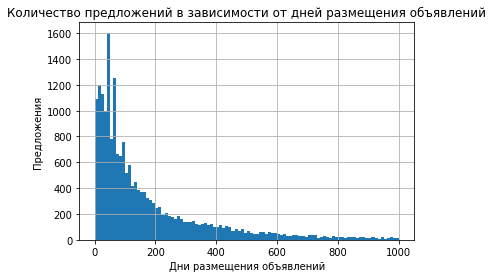

In [60]:
flats['days_exposition'].hist(bins=100, range=(0, 1000))
plt.title('Количество предложений в зависимости от дней размещения объявлений')
plt.xlabel('Дни размещения объявлений')
plt.ylabel('Предложения')
plt.show()

In [61]:
print('Медиана количества дней размещения объявлений:', 
      flats[flats['days_exposition'] != -1]['days_exposition'].mean())

Медиана количества дней размещения объявлений: 182.08430217927426


In [62]:
print('Среднее количества дней размещения объявлений:', 
      flats[flats['days_exposition'] != -1]['days_exposition'].median())

Среднее количества дней размещения объявлений: 96.0


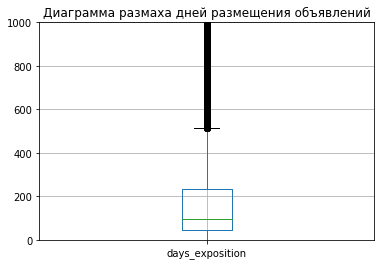

In [63]:
plt.ylim(0, 1000)
flats[flats['days_exposition'] != -1].boxplot(column='days_exposition')
plt.title('Диаграмма размаха дней размещения объявлений')
plt.show()

For the ad placement days measure, the average was almost twice the median. This suggests that the distribution has a long tail of high values (or a few very large values) affecting the mean but not the median. The upper "whisker" of the range diagram ends around 500, exceeding values can be considered outliers. When comparing the histogram and the swing chart, the value 1000 was chosen to exclude the most outliers. Further, outliers were also excluded for indicators of area, price, number of rooms and ceiling heights.

In [64]:
print('Количество выбивающихся значений по общей площади:', 
      len(flats.query('total_area > 400')))

Количество выбивающихся значений по общей площади: 23


In [65]:
flats = flats[flats['total_area'] <= 400]
flats.reset_index(drop=True, inplace=True)
flats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22944 entries, 0 to 22943
Data columns (total 33 columns):
total_images            22944 non-null int64
last_price              22944 non-null float64
total_area              22944 non-null float64
first_day_exposition    22944 non-null datetime64[ns]
rooms                   22944 non-null int64
ceiling_height          22944 non-null float64
floors_total            22944 non-null int64
living_area             22944 non-null float64
floor                   22944 non-null int64
is_apartment            22944 non-null bool
studio                  22944 non-null bool
open_plan               22944 non-null bool
kitchen_area            22944 non-null float64
balcony                 22944 non-null int64
locality_name           22944 non-null object
airports_nearest        22944 non-null float64
cityCenters_nearest     22944 non-null float64
parks_around3000        22944 non-null int64
parks_nearest           22944 non-null float64
ponds_around3

In [66]:
print('Количество выбивающихся значений по цене:',
      len(flats.query('last_price > 30000000')))

Количество выбивающихся значений по цене: 291


In [67]:
flats = flats[flats['last_price'] <= 30000000]
flats.reset_index(drop=True, inplace=True)
flats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22653 entries, 0 to 22652
Data columns (total 33 columns):
total_images            22653 non-null int64
last_price              22653 non-null float64
total_area              22653 non-null float64
first_day_exposition    22653 non-null datetime64[ns]
rooms                   22653 non-null int64
ceiling_height          22653 non-null float64
floors_total            22653 non-null int64
living_area             22653 non-null float64
floor                   22653 non-null int64
is_apartment            22653 non-null bool
studio                  22653 non-null bool
open_plan               22653 non-null bool
kitchen_area            22653 non-null float64
balcony                 22653 non-null int64
locality_name           22653 non-null object
airports_nearest        22653 non-null float64
cityCenters_nearest     22653 non-null float64
parks_around3000        22653 non-null int64
parks_nearest           22653 non-null float64
ponds_around3

In [68]:
print('Количество выбивающихся значений по количеству комнат:',
      len(flats.query('rooms > 10')))

Количество выбивающихся значений по количеству комнат: 4


In [69]:
flats = flats[flats['rooms'] <= 10]
flats.reset_index(drop=True, inplace=True)
flats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22649 entries, 0 to 22648
Data columns (total 33 columns):
total_images            22649 non-null int64
last_price              22649 non-null float64
total_area              22649 non-null float64
first_day_exposition    22649 non-null datetime64[ns]
rooms                   22649 non-null int64
ceiling_height          22649 non-null float64
floors_total            22649 non-null int64
living_area             22649 non-null float64
floor                   22649 non-null int64
is_apartment            22649 non-null bool
studio                  22649 non-null bool
open_plan               22649 non-null bool
kitchen_area            22649 non-null float64
balcony                 22649 non-null int64
locality_name           22649 non-null object
airports_nearest        22649 non-null float64
cityCenters_nearest     22649 non-null float64
parks_around3000        22649 non-null int64
parks_nearest           22649 non-null float64
ponds_around3

In [70]:
print('Количество выбивающихся значений по высоте комнат:',
      len(flats[flats['ceiling_height'] != -1].query('ceiling_height < 2 or ceiling_height > 5')))

Количество выбивающихся значений по высоте комнат: 34


In [71]:
flats = flats[flats['ceiling_height'] <= 5]
flats.reset_index(drop=True, inplace=True)
flats = flats[(flats['ceiling_height'] <= -1) | (flats['ceiling_height'] >= 2)]
flats.reset_index(drop=True, inplace=True)
flats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22615 entries, 0 to 22614
Data columns (total 33 columns):
total_images            22615 non-null int64
last_price              22615 non-null float64
total_area              22615 non-null float64
first_day_exposition    22615 non-null datetime64[ns]
rooms                   22615 non-null int64
ceiling_height          22615 non-null float64
floors_total            22615 non-null int64
living_area             22615 non-null float64
floor                   22615 non-null int64
is_apartment            22615 non-null bool
studio                  22615 non-null bool
open_plan               22615 non-null bool
kitchen_area            22615 non-null float64
balcony                 22615 non-null int64
locality_name           22615 non-null object
airports_nearest        22615 non-null float64
cityCenters_nearest     22615 non-null float64
parks_around3000        22615 non-null int64
parks_nearest           22615 non-null float64
ponds_around3

In [72]:
print('Количество выбивающихся значений по дня размещения объявлений:',
      len(flats[flats['days_exposition'] != -1].query('days_exposition > 1000')))

Количество выбивающихся значений по дня размещения объявлений: 259


In [73]:
flats = flats[flats['days_exposition'] <= 1000]
flats.reset_index(drop=True, inplace=True)
flats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22356 entries, 0 to 22355
Data columns (total 33 columns):
total_images            22356 non-null int64
last_price              22356 non-null float64
total_area              22356 non-null float64
first_day_exposition    22356 non-null datetime64[ns]
rooms                   22356 non-null int64
ceiling_height          22356 non-null float64
floors_total            22356 non-null int64
living_area             22356 non-null float64
floor                   22356 non-null int64
is_apartment            22356 non-null bool
studio                  22356 non-null bool
open_plan               22356 non-null bool
kitchen_area            22356 non-null float64
balcony                 22356 non-null int64
locality_name           22356 non-null object
airports_nearest        22356 non-null float64
cityCenters_nearest     22356 non-null float64
parks_around3000        22356 non-null int64
parks_nearest           22356 non-null float64
ponds_around3

Outlier values for area, price, number of rooms, ceiling heights, and ad placement days were excluded. The base for further analysis after the manipulations contains 22,356 lines.

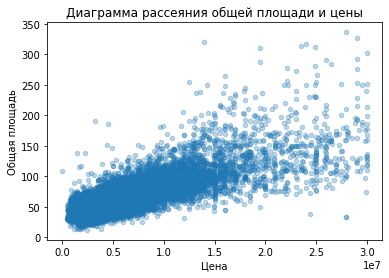

In [74]:
flats.plot(x='last_price', y='total_area', kind='scatter', alpha=0.3)
plt.title('Диаграмма рассеяния общей площади и цены')
plt.xlabel('Цена')
plt.ylabel('Общая площадь')
plt.show()

In [75]:
print('Коэффициент корреляции между ценой и общей площадью:',
      flats['last_price'].corr(flats['total_area']))

Коэффициент корреляции между ценой и общей площадью: 0.7940832804831778


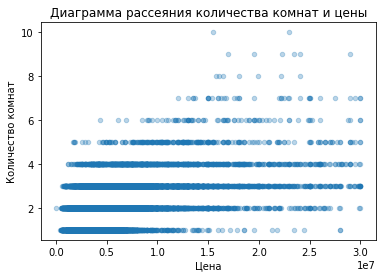

In [76]:
flats.plot(x='last_price', y='rooms', kind='scatter', alpha=0.3)
plt.title('Диаграмма рассеяния количества комнат и цены')
plt.xlabel('Цена')
plt.ylabel('Количество комнат')
plt.show()

In [77]:
print('Коэффициент корреляции между ценой и количеством комнат:',
      flats['last_price'].corr(flats['rooms']))

Коэффициент корреляции между ценой и количеством комнат: 0.5229843488507828


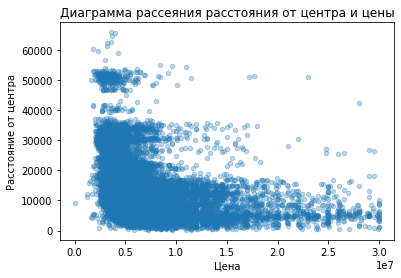

In [78]:
flats_center = flats.query('cityCenters_nearest != -1')
flats_center.plot(x='last_price', y='cityCenters_nearest', kind='scatter', alpha=0.3)
plt.title('Диаграмма рассеяния расстояния от центра и цены')
plt.xlabel('Цена')
plt.ylabel('Расстояние от центра')
plt.show()

In [79]:
print('Коэффициент корреляции между ценой и расстоянием от центра:',
      flats_center['last_price'].corr(flats_center['cityCenters_nearest']))

Коэффициент корреляции между ценой и расстоянием от центра: -0.34842016618629634


An analysis of the dependence of price on area, number of rooms, and distance from the center (excluding missing values) using scatterplots and correlation coefficients showed that the area of an apartment has the greatest influence on price. The number of rooms depends on the price, but not too strong. Probably in this case, additional parameters have an influence. As well as in the case of the distance from the center, where the dependence is the least pronounced of all three considered parameters.

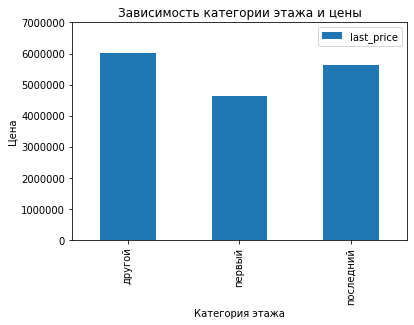

In [80]:
flats.pivot_table(index='floor_cat', values='last_price').plot(kind='bar', ylim=(0, 7000000))
plt.title('Зависимость категории этажа и цены')
plt.xlabel('Категория этажа')
plt.ylabel('Цена')
plt.show()

Based on the chart above, it was concluded that apartments on the first floor have the lowest average price. The average prices for the top floor and the other floor are close, but still the most profitable is the sale of apartments that are not on the first or top floors.

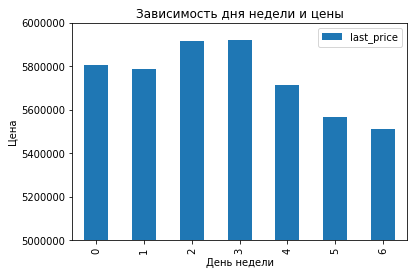

In [81]:
flats.pivot_table(index='weekday', values='last_price').plot(kind='bar', ylim=(5000000, 6000000))
plt.title('Зависимость дня недели и цены')
plt.xlabel('День недели')
plt.ylabel('Цена')
plt.show()

The graph of the dependence of the average price on the day of the week was formed with a drawing restriction from below in the amount of 5,000,000 rubles for better visibility. In general, each day of the week showed a similar result, that is, the dependence is low, but it is noteworthy that the publication on weekends reduces the price, apparently due to the fact that the attention of potential buyers is distracted by personal matters on rest days, and days on the middle of the week (Wednesday and Thursday) are the most profitable for sellers due to the closest proximity to the weekend and the "holiday mood" of buyers.

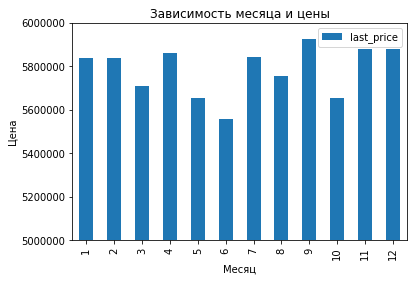

In [82]:
flats.pivot_table(index='month', values='last_price').plot(kind='bar', ylim=(5000000, 6000000))
plt.title('Зависимость месяца и цены')
plt.xlabel('Месяц')
plt.ylabel('Цена')
plt.show()

The graph of the dependence of the average price on the month was formed with a restriction of drawing from below in the amount of 5,000,000 rubles for better visibility. In general, each month showed a similar result, that is, the dependence is low, but it is noteworthy that June has the lowest average. This seems to be due to the standard start of the holiday season and the decrease in the number of interested buyers.

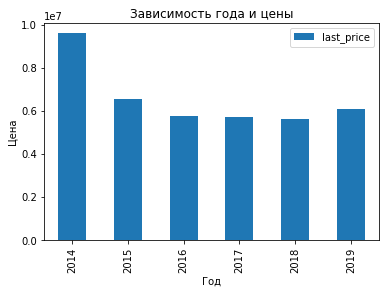

In [83]:
flats.pivot_table(index='year', values='last_price').plot(kind='bar')
plt.title('Зависимость года и цены')
plt.xlabel('Год')
plt.ylabel('Цена')
plt.show()

The plot of the average price versus year shows a significant difference between the indicators in 2014 and 2015 and the overall rise of the indicator in 2014 over all other years. Probably, this situation has developed due to the impact on the price of housing of the currency crisis at the turn of 2014 and 2015. The highest average price is in 2014 before the crisis with a significant drop until 2018 and the beginning of the recovery of the housing market in 2019.

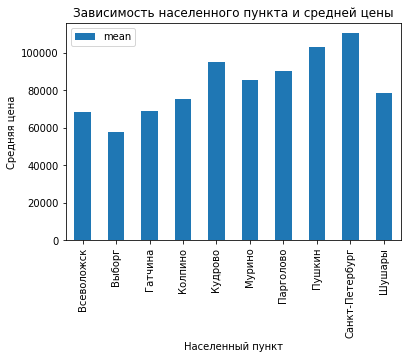

In [84]:
flats_cities = flats.pivot_table(index='locality_name', values='m_price', aggfunc=['count', 'mean'])
flats_cities.columns = ['count', 'mean']
flats_top_cities = flats_cities.sort_values(by = 'count', ascending = False).head(10)
flats_top_cities.pivot_table(index='locality_name', values='mean').plot(kind='bar')
plt.title('Зависимость населенного пункта и средней цены')
plt.xlabel('Населенный пункт')
plt.ylabel('Средняя цена')
plt.show()

As expected, an analysis of the 10 locations with the highest number of ads showed that St. Petersburg has the highest average cost per square meter of housing. As you can see on the graph, Vyborg has the lowest cost.

In [85]:
flats['cityCenters_nearest_km'] = flats['cityCenters_nearest'] / 1000
flats['cityCenters_nearest_km'] = flats['cityCenters_nearest_km'].astype('int')
flats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22356 entries, 0 to 22355
Data columns (total 34 columns):
total_images              22356 non-null int64
last_price                22356 non-null float64
total_area                22356 non-null float64
first_day_exposition      22356 non-null datetime64[ns]
rooms                     22356 non-null int64
ceiling_height            22356 non-null float64
floors_total              22356 non-null int64
living_area               22356 non-null float64
floor                     22356 non-null int64
is_apartment              22356 non-null bool
studio                    22356 non-null bool
open_plan                 22356 non-null bool
kitchen_area              22356 non-null float64
balcony                   22356 non-null int64
locality_name             22356 non-null object
airports_nearest          22356 non-null float64
cityCenters_nearest       22356 non-null float64
parks_around3000          22356 non-null int64
parks_nearest           

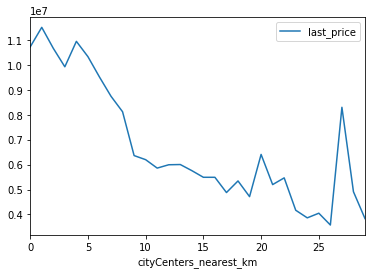

In [86]:
flats_spb = (
    flats
    .query('locality_name == "Санкт-Петербург"')
    .pivot_table(index='cityCenters_nearest_km', values='last_price')
)
flats_spb.plot()

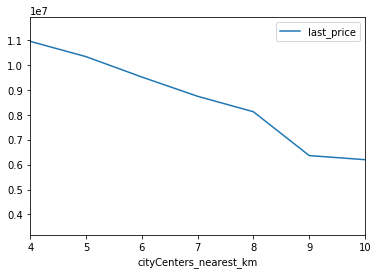

In [87]:
flats_spb.plot(xlim=(4, 10))

For clarity, the search for a sharp change (fall) in the average price, depending on the distance, 2 graphs were built. Visually, a sharp change is observed at a value of 8 km.

In [88]:
flats_spb_center = (
    flats
    .query('locality_name == "Санкт-Петербург" and cityCenters_nearest_km <= 8')
)
flats_spb_center.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4013 entries, 2 to 22352
Data columns (total 34 columns):
total_images              4013 non-null int64
last_price                4013 non-null float64
total_area                4013 non-null float64
first_day_exposition      4013 non-null datetime64[ns]
rooms                     4013 non-null int64
ceiling_height            4013 non-null float64
floors_total              4013 non-null int64
living_area               4013 non-null float64
floor                     4013 non-null int64
is_apartment              4013 non-null bool
studio                    4013 non-null bool
open_plan                 4013 non-null bool
kitchen_area              4013 non-null float64
balcony                   4013 non-null int64
locality_name             4013 non-null object
airports_nearest          4013 non-null float64
cityCenters_nearest       4013 non-null float64
parks_around3000          4013 non-null int64
parks_nearest             4013 non-null flo

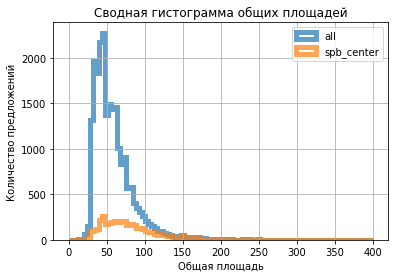

In [89]:
ax_total_area = flats.plot(kind='hist', 
                           y='total_area', 
                           histtype='step', 
                           range=(0, 400), 
                           bins=100, 
                           linewidth=5, 
                           alpha=0.7, 
                           label='all')
flats_spb_center.plot(kind='hist', 
                      y='total_area', 
                      histtype='step', 
                      range=(0, 400), 
                      bins=100, 
                      linewidth=5, 
                      alpha=0.7, 
                      label='spb_center', 
                      ax=ax_total_area, 
                      grid=True, 
                      legend=True)
plt.title('Сводная гистограмма общих площадей')
plt.xlabel('Общая площадь')
plt.ylabel('Количество предложений')
plt.show()

Visually, the histograms for the total area parameter for all data and data only for the center of St. Petersburg are close with an obvious difference in the number of proposals, and therefore the peak of the histogram according to the center of St. Petersburg is much lower.

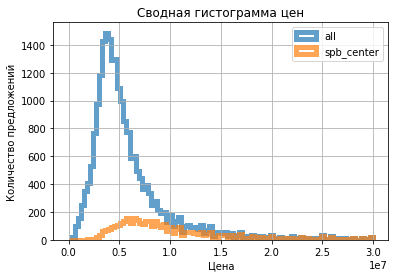

In [90]:
ax_last_price = flats.plot(kind='hist', 
                           y='last_price', 
                           histtype='step', 
                           range=(0, 30000000), 
                           bins=100, 
                           linewidth=5, 
                           alpha=0.7, 
                           label='all')
flats_spb_center.plot(kind='hist', 
                      y='last_price', 
                      histtype='step', 
                      range=(0, 30000000), 
                      bins=100, 
                      linewidth=5, 
                      alpha=0.7, 
                      label='spb_center', 
                      ax=ax_last_price, 
                      grid=True, 
                      legend=True)
plt.title('Сводная гистограмма цен')
plt.xlabel('Цена')
plt.ylabel('Количество предложений')
plt.show()

Visually, the histograms for the price parameter for all data and data only for the center of St. Petersburg are close with an obvious difference in the number of offers, and therefore the peak of the histogram according to the center of St. Petersburg is much lower. The peak of the histogram according to the data for the center of St. Petersburg turned out to be shifted further from 0, which confirms the previously discovered trend with a higher average price in St. Petersburg.

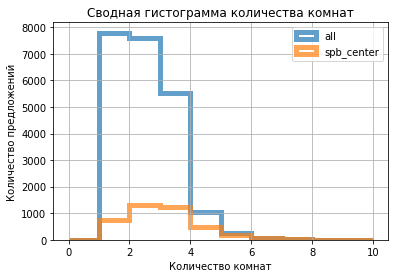

In [91]:
ax_rooms = flats.plot(kind='hist', 
                      y='rooms', 
                      histtype='step', 
                      range=(0, 10), 
                      bins=10, 
                      linewidth=5, 
                      alpha=0.7, 
                      label='all')
flats_spb_center.plot(kind='hist', 
                      y='rooms', 
                      histtype='step', 
                      range=(0, 10), 
                      bins=10, 
                      linewidth=5, 
                      alpha=0.7, 
                      label='spb_center', 
                      ax=ax_rooms, 
                      grid=True, 
                      legend=True)
plt.title('Сводная гистограмма количества комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Количество предложений')
plt.show()

A visual comparison of histograms for the number of rooms parameter for all data and data for the center of St. Petersburg alone shows a sharp increase in the number of offers with three-room apartments and a decrease in offers for one-room apartments. If in the case of all data, the maximum number of offers was for two-room apartments, then for the center of St. Petersburg the situation turned out to be similar, but with a close value for three-room apartments.

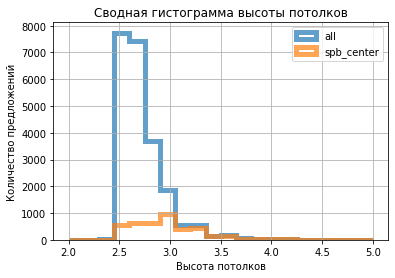

In [92]:
ax_ceiling_height = flats.plot(kind='hist', 
                               y='ceiling_height', 
                               histtype='step', 
                               range=(2, 5), 
                               bins=20, 
                               linewidth=5, 
                               alpha=0.7, 
                               label='all')
flats_spb_center.plot(kind='hist', 
                      y='ceiling_height', 
                      histtype='step', 
                      range=(2, 5), 
                      bins=20, 
                      linewidth=5, 
                      alpha=0.7, 
                      label='spb_center', 
                      ax=ax_ceiling_height, 
                      grid=True, 
                      legend=True)
plt.title('Сводная гистограмма высоты потолков')
plt.xlabel('Высота потолков')
plt.ylabel('Количество предложений')
plt.show()

A visual comparison of histograms for the ceiling height parameter for all data and data for the center of St. Petersburg alone shows a sharp increase in the number of proposals with ceilings of about 3 meters. This is probably due to the fact that the center of St. Petersburg is dominated by old buildings, in which a higher height of residential premises is adopted.

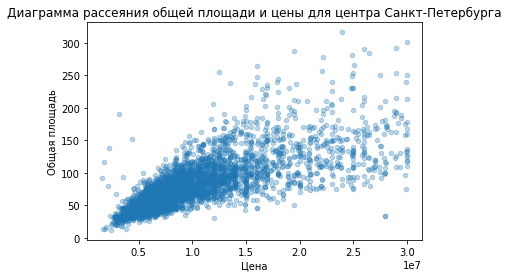

In [93]:
flats_spb_center.plot(x='last_price', y='total_area', kind='scatter', alpha=0.3)
plt.title('Диаграмма рассеяния общей площади и цены для центра Санкт-Петербурга')
plt.xlabel('Цена')
plt.ylabel('Общая площадь')
plt.show()

In [94]:
print('Коэффициент корреляции между ценой и общей площадью для центра Санкт-Петербурга:',
      flats_spb_center['last_price'].corr(flats_spb_center['total_area']))

Коэффициент корреляции между ценой и общей площадью для центра Санкт-Петербурга: 0.7516786096521804


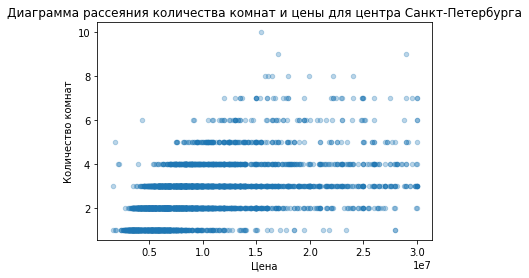

In [95]:
flats_spb_center.plot(x='last_price', y='rooms', kind='scatter', alpha=0.3)
plt.title('Диаграмма рассеяния количества комнат и цены для центра Санкт-Петербурга')
plt.xlabel('Цена')
plt.ylabel('Количество комнат')
plt.show()

In [96]:
print('Коэффициент корреляции между ценой и количеством комнат для центра Санкт-Петербурга:',
      flats_spb_center['last_price'].corr(flats_spb_center['rooms']))

Коэффициент корреляции между ценой и количеством комнат для центра Санкт-Петербурга: 0.5011185321523843


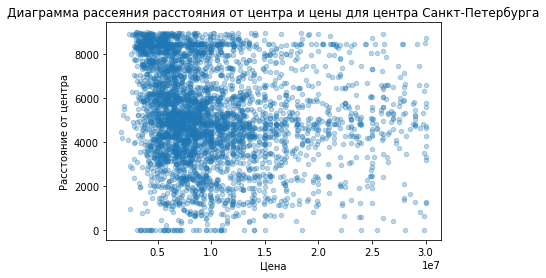

In [97]:
flats_spb_center.plot(x='last_price', y='cityCenters_nearest', kind='scatter', alpha=0.3)
plt.title('Диаграмма рассеяния расстояния от центра и цены для центра Санкт-Петербурга')
plt.xlabel('Цена')
plt.ylabel('Расстояние от центра')
plt.show()

In [98]:
print('Коэффициент корреляции между ценой и расстоянием от центра для центра Санкт-Петербурга:',
      flats_spb_center['last_price'].corr(flats_spb_center['cityCenters_nearest']))

Коэффициент корреляции между ценой и расстоянием от центра для центра Санкт-Петербурга: -0.1596679547049015


As before, when analyzing all the data, in the case of data only for the center of St. Petersburg, the analysis of dependencies showed that the area of the apartment has the greatest influence on the price. The corresponding correlation coefficients turned out to be close. The number of rooms for the center of St. Petersburg depends on the price, but not too strong. The correlation coefficients in this case also turned out to be close.  The largest difference between the two data blocks under consideration turned out to be in the correlation coefficients for the dependence on the distance from the center - this dependence for the center of this area.

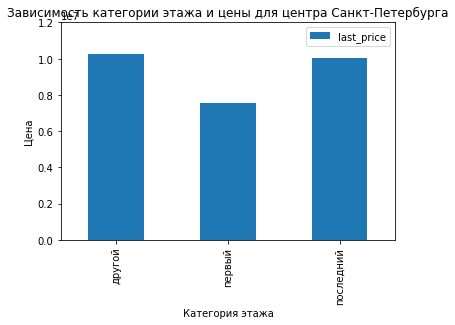

In [99]:
flats_spb_center.pivot_table(index='floor_cat', values='last_price').plot(kind='bar', ylim=(0, 12000000))
plt.title('Зависимость категории этажа и цены для центра Санкт-Петербурга')
plt.xlabel('Категория этажа')
plt.ylabel('Цена')
plt.show()

For the center of St. Petersburg, the trend for all data remains that apartments on the ground floor have the lowest average price. The average prices for the top floor and the other floor are also close, but still the most profitable is the sale of apartments that are not on the first or top floors.

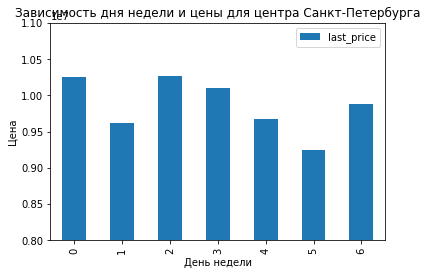

In [100]:
flats_spb_center.pivot_table(index='weekday', values='last_price').plot(kind='bar', ylim=(8000000, 11000000))
plt.title('Зависимость дня недели и цены для центра Санкт-Петербурга')
plt.xlabel('День недели')
plt.ylabel('Цена')
plt.show()

The graph of the dependence of the average price on the day of the week was formed with drawing restrictions for better visibility. In general, for the data for the center of St. Petersburg, each day of the week also showed a fairly close result, that is, the dependence is low, but the differences are noteworthy in that the publications on Sunday and Monday increased in terms of the average price to the values on Wednesday and Thursday.

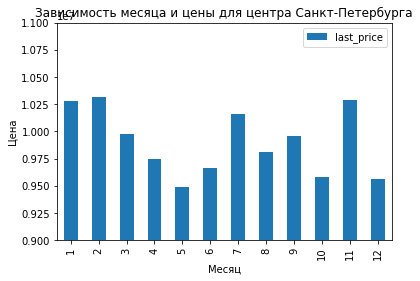

In [101]:
flats_spb_center.pivot_table(index='month', values='last_price').plot(kind='bar', ylim=(9000000, 11000000))
plt.title('Зависимость месяца и цены для центра Санкт-Петербурга')
plt.xlabel('Месяц')
plt.ylabel('Цена')
plt.show()

The average price vs. month graph was generated with drawing restrictions for better visibility. In general, each month showed a similar result for the center of St. Petersburg, that is, the dependence is low, but it is noteworthy that, unlike the general data, May, October and December have a close low average.

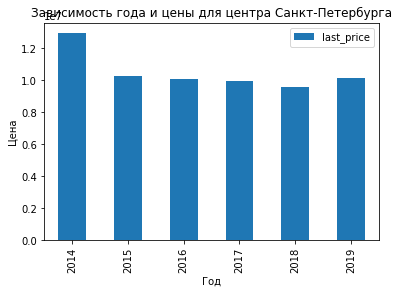

In [102]:
flats_spb_center.pivot_table(index='year', values='last_price').plot(kind='bar')
plt.title('Зависимость года и цены для центра Санкт-Петербурга')
plt.xlabel('Год')
plt.ylabel('Цена')
plt.show()

The plot of the average price versus year for the center of St. Petersburg shows the difference between the indicators in 2014 and 2015 and the overall rise in the indicator of 2014 over all other years, but not with such a significant difference. It is likely that the impact of the currency crisis at the turn of 2014 and 2015 smoothed out for St. Petersburg, as the most attractive housing market in the data under consideration.

## Step 5. General conclusion<a id="finish"></a>

During the implementation of this project, data from the Yandex.Realty service was processed and analyzed - an archive of ads for the sale of apartments in St. Petersburg and neighboring settlements for several years. Omissions were processed, additional indicators (columns) needed for further analysis were added, and outliers were excluded using a more detailed analysis of individual important indicators.

In the course of analyzing the dependence of the offer price on the area, number of rooms and distance from the center using scatter diagrams and correlation coefficients, it was noted that the apartment area has the greatest influence on the price. The number of rooms depends on the price, but not too strong. Probably in this case, additional parameters have an influence. As well as in the case of the distance from the center, where the dependence is the least pronounced of all three considered parameters.

It was also determined that apartments on the ground floor have the lowest average price. The average prices for the top floor and the other floor are close, but still the most profitable is the sale of apartments that are not on the first or top floors.

Days of the week and months of placement have little effect on the average price of offers, unlike the year, depending on which there is a sharp drop in the average price after 2014, which is likely due to the currency crisis at the turn of 2014 and 2015.

An analysis of 10 settlements with the largest number of ads showed that the highest average cost per square meter of housing is in St. Petersburg, and the lowest in Vyborg.

According to the analysis of the nature of the change in the average price in St. Petersburg from the distance from the center, a radius of 8 kilometers was allocated, denoting the center of the city.

Comparison of the analysis of all the above indicators for all data and the center of St. Petersburg confirmed the previously discovered trend in a higher average price in St. Petersburg offers with ceilings of about 3 meters.

When analyzing the dependences of housing prices in the center of St. Petersburg, conclusions close to the previously made conclusions were obtained according to the general data that the area of the apartment has the greatest influence on the price, and the number of rooms depends on the price, but not too strong. In turn, the dependence on the distance from the center has significantly approached zero, which is probably due to the fact that a small area close to the center is considered in relation to all data.

Days of the week and months of placement for the center of St. Petersburg also have little effect on the average price of offers, and in part of the year, the fall in the average price after 2014 turned out to be much smoother.

*Thus, according to the analysis carried out, the most profitable and liquid is the purchase of an apartment in the center of St. Petersburg, preferably a three-room apartment, and located not on the first or last floor.*